# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

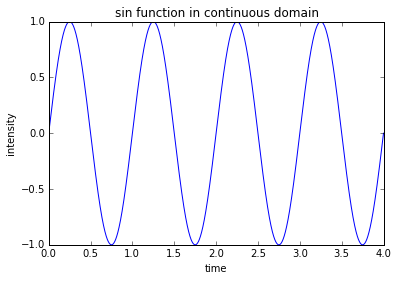

In [96]:
t=np.linspace(0,4,10000) #create a array with 10000 between 0 and 4
x=np.sin(2*np.pi*t) #calculate each point value

plt.figure()
plt.title("sin function in continuous domain")
plt.xlabel("time")
plt.ylabel("intensity")
plt.plot(t,x)

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

<Container object of 3 artists>

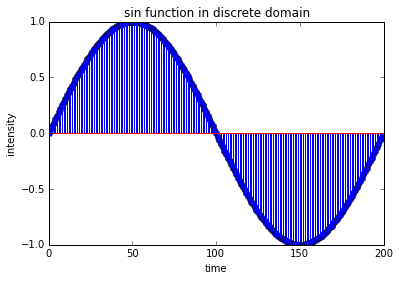

In [95]:
n=np.arange(0,200)
f=1
fstep=200
x=np.sin(2*np.pi*n*f/fstep)

plt.figure()
plt.title("sin function in discrete domain")
plt.xlabel("time")
plt.ylabel("intensity")
plt.stem(x)

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

<Container object of 3 artists>

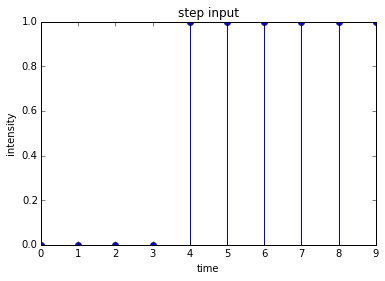

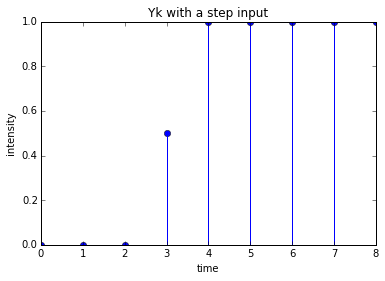

In [98]:
def step( k,N ): #define function
    A = np.zeros(N) #fill a array of size N with zero value
    for i in range(k, A.size) : #fill the array with one from k to the end
        A[i]=1 
    return A 

def y(x): #define function
    B = np.zeros(x.size) #fill a array of size N with zero value
    for i in range(0, x.size-1) : #calculate the value for each B
        B[i]=(x[i]+x[i+1])/2
    return B[0:-1] #return and cut the las value wich is wrong


plt.figure()
plt.title("step input")
plt.xlabel("time")
plt.ylabel("intensity")
plt.stem( (step(4,10)) )

plt.figure()
plt.title("Yk with a step input")
plt.xlabel("time")
plt.ylabel("intensity")
plt.stem( y(step(4,10)) )


**1.2** Propose a modification to obtain a causal version

<Container object of 3 artists>

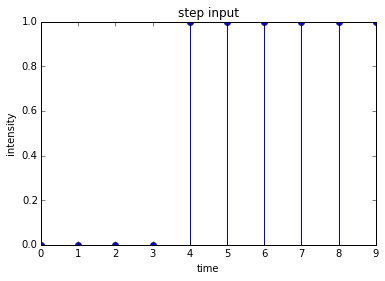

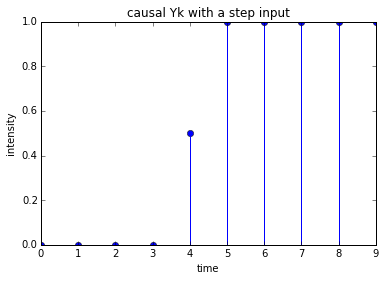

In [99]:

def causaly(x):
    B = np.zeros(x.size)
    for i in range(1, x.size) :
        B[i]=(x[i-1]+x[i])/2
    return B 


plt.figure()
plt.title("step input")
plt.xlabel("time")
plt.ylabel("intensity")
plt.stem( (step(4,10)) )

plt.figure()
plt.title("causal Yk with a step input")
plt.xlabel("time")
plt.ylabel("intensity")
plt.stem( causaly(step(4,10)) )


Comments on your observations

A simple shift in the index will make the system causal. In fact the first one is non causal as it use the futur [i+1] while for the second one we use the past [i-1]

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [33]:
def accumulator(x):
    acc=np.zeros(x.size)
    for i in range (0,x.size) :
        acc[i]=np.sum(x[0:i+1])
    return acc


<Container object of 3 artists>

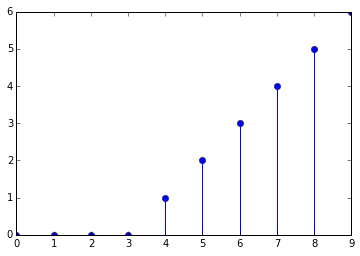

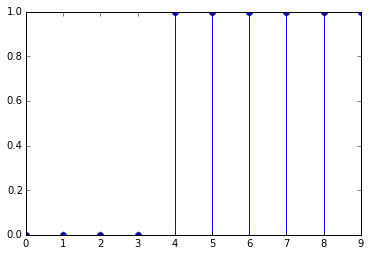

In [32]:


plt.figure()
plt.stem( accumulator(step(4,10)) )
plt.figure()
plt.stem( (step(4,10)) )



**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

<Container object of 3 artists>

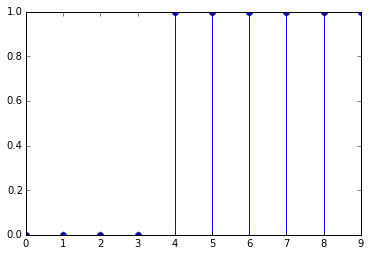

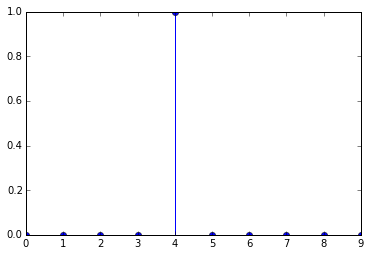

In [36]:
def dirac( k,N ):
    A = np.zeros(N)
    A[k]=1
    return A 

plt.figure()
plt.stem( accumulator(dirac(4,10)) )
plt.figure()
plt.stem( (dirac(4,10)) )



**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

<Container object of 3 artists>

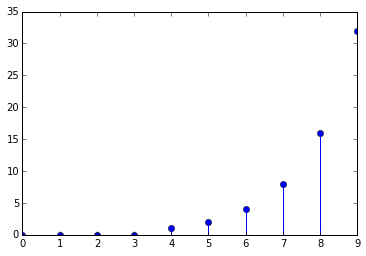

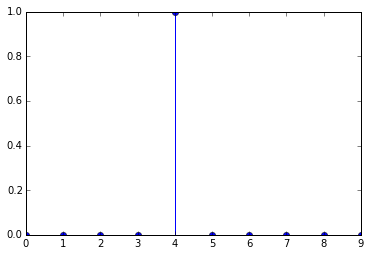

In [43]:
def funk(x):
    B = np.zeros(x.size)
    B[0]=x[0]
    for i in range(1, x.size) :
        B[i]=(x[i]+2*B[i-1])
    return B 


plt.figure()
plt.stem( funk(dirac(4,10)) )
plt.figure()
plt.stem( (dirac(4,10)) )


**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

<Container object of 3 artists>

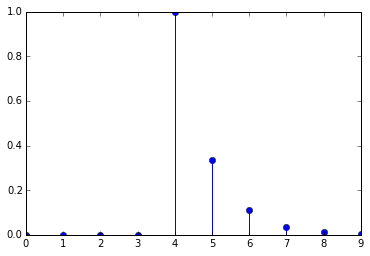

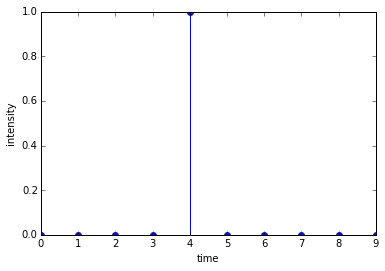

In [73]:
def funk2(x):
    B = np.zeros(x.size)
    B[0]=x[0]
    for i in range(1, x.size) :
        B[i]=(x[i]+B[i-1]/3)
    return B 


plt.figure()
plt.stem( funk2(dirac(4,10)) )
plt.figure()
plt.xlabel("time")
plt.ylabel("intensity")
plt.stem( (dirac(4,10)) )


Comments your observations

**Answer 2.1** dfxdg

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


<Container object of 3 artists>

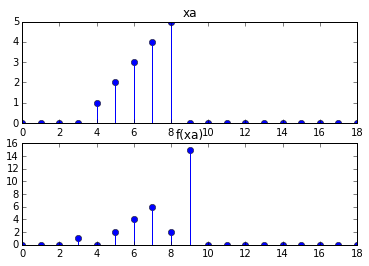

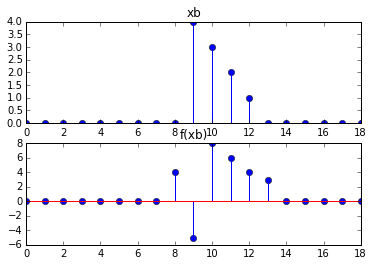

In [58]:
xa=np.array([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
xb=np.array([0,0,0,0,0,0,0,0,0,4,3,2,1,0,0,0,0,0,0])

def funk3(x):
    B = np.zeros(x.size)
    for i in range(1, x.size-1) :
        B[i]=(3*x[i-1]-2*x[i]+x[i+1])
    return B 


plt.figure()
plt.subplot(2,1,1)
plt.title("xa")
plt.stem(xa)
plt.subplot(2,1,2)
plt.title("f(xa)")
plt.stem( funk3(xa))

plt.figure()
plt.subplot(2,1,1)
plt.title("xb")
plt.stem(xb)
plt.subplot(2,1,2)
plt.title("f(xb)")
plt.stem( funk3(xb))



**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


<Container object of 3 artists>

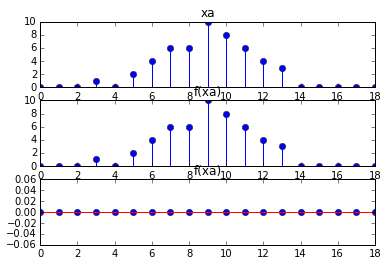

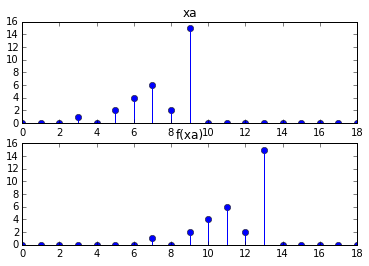

In [83]:



plt.figure()
plt.subplot(3,1,1)
plt.title("xa")
plt.stem( funk3(xa+xb))
plt.subplot(3,1,2)
plt.title("f(xa)")
plt.stem( funk3(xa)+funk3(xb))
plt.subplot(3,1,3)
plt.title("f(xa)")
plt.stem( funk3(xa)+funk3(xb)- funk3(xa+xb)) #if equal to zero linear

plt.figure()
plt.subplot(2,1,1)
plt.title("xa")
plt.stem( funk3(xa))
plt.subplot(2,1,2)
plt.title("f(xa)")
plt.stem( funk3(np.convolve(dirac(4,xa.size),xa)[0:xa.size]))


 #invariant if delay output the same function but with a delay



The function is linear as f(a+b)-f(a)-f(b)=0 . The function is invariant as f(x-k)-f(x)*dirac(a-k)=0 (the output is the same but with a retard)

**3.3** Propose a nonlinear/noninvariant system.

<Container object of 3 artists>

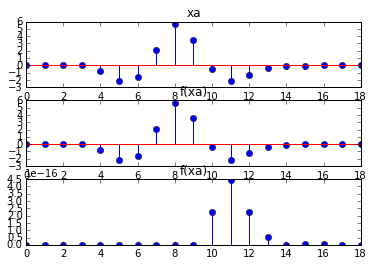

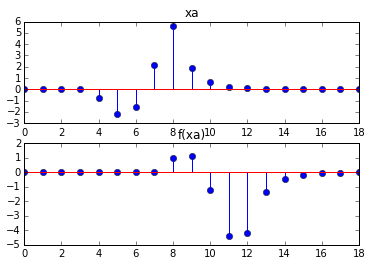

In [88]:
def funk4(x):
    B = np.zeros(x.size)
    B[0]=x[0]
    for i in range(1, x.size) :
        B[i]=(x[i]*np.sin(i)+B[i-1]/3)
    return B 



plt.figure()
plt.subplot(3,1,1)
plt.title("xa")
plt.stem( funk4(xa+xb))
plt.subplot(3,1,2)
plt.title("f(xa)")
plt.stem( funk4(xa)+funk4(xb))
plt.subplot(3,1,3)
plt.title("f(xa)")
plt.stem( funk4(xa)+funk4(xb)- funk4(xa+xb)) 


plt.figure()
plt.subplot(2,1,1)
plt.title("xa")
plt.stem( funk4(xa))
plt.subplot(2,1,2)
plt.title("f(xa)")
plt.stem( funk4(np.convolve(dirac(4,xa.size),xa)[0:xa.size]))


In [ ]:
The system is non linear  as f(a+b)-f(a)-f(b)=! 0 . The system if non invariant as   f(x-k)-f(x)*dirac(a-k)=! 0 